In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#some code related to joins
#merchant=pd.read_csv('merchants.csv')
#df=Train.merge(df_new_merchant_transactions,how='inner',on='card_id')
#d=df.merge(merchant,how='inner',on='merchant_id')
#d.to_csv('train_final.csv')
#result = pd.merge(Test, df_new_merchant_transactions, how='inner', on=['card_id'])
#convert to the excel file and started freash

In [2]:
Test=pd.read_csv('final.csv')

In [4]:
Train=pd.read_csv('train_final.csv')

In [6]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173880 entries, 0 to 173879
Data columns (total 41 columns):
Unnamed: 0                     173880 non-null int64
first_active_month             173880 non-null object
card_id                        173880 non-null object
feature_1                      173880 non-null int64
feature_2                      173880 non-null int64
feature_3                      173880 non-null int64
target                         173880 non-null float64
authorized_flag                173880 non-null object
city_id_x                      173880 non-null int64
category_1_x                   173880 non-null object
installments                   173880 non-null int64
category_3                     170274 non-null object
merchant_category_id_x         173880 non-null int64
merchant_id                    173880 non-null object
month_lag                      173880 non-null int64
purchase_amount                173880 non-null float64
purchase_date                  

In [7]:
Train.drop(['city_id_y','state_id_y','category_2_y','category_1_y','subsector_id_y','merchant_category_id_y'],inplace=True,axis=1)

In [8]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173880 entries, 0 to 173879
Data columns (total 35 columns):
Unnamed: 0                     173880 non-null int64
first_active_month             173880 non-null object
card_id                        173880 non-null object
feature_1                      173880 non-null int64
feature_2                      173880 non-null int64
feature_3                      173880 non-null int64
target                         173880 non-null float64
authorized_flag                173880 non-null object
city_id_x                      173880 non-null int64
category_1_x                   173880 non-null object
installments                   173880 non-null int64
category_3                     170274 non-null object
merchant_category_id_x         173880 non-null int64
merchant_id                    173880 non-null object
month_lag                      173880 non-null int64
purchase_amount                173880 non-null float64
purchase_date                  

In [10]:
Train.rename(columns={'category_1_x':'category_1','category_2_x':'category_2'},inplace=True)

In [11]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173880 entries, 0 to 173879
Data columns (total 35 columns):
Unnamed: 0                     173880 non-null int64
first_active_month             173880 non-null object
card_id                        173880 non-null object
feature_1                      173880 non-null int64
feature_2                      173880 non-null int64
feature_3                      173880 non-null int64
target                         173880 non-null float64
authorized_flag                173880 non-null object
city_id_x                      173880 non-null int64
category_1                     173880 non-null object
installments                   173880 non-null int64
category_3                     170274 non-null object
merchant_category_id_x         173880 non-null int64
merchant_id                    173880 non-null object
month_lag                      173880 non-null int64
purchase_amount                173880 non-null float64
purchase_date                  

In [13]:
Train.drop(['city_id_x','merchant_category_id_x','state_id_x','subsector_id_x','merchant_group_id','Unnamed: 0'],axis=1,inplace=True)

In [14]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173880 entries, 0 to 173879
Data columns (total 29 columns):
first_active_month             173880 non-null object
card_id                        173880 non-null object
feature_1                      173880 non-null int64
feature_2                      173880 non-null int64
feature_3                      173880 non-null int64
target                         173880 non-null float64
authorized_flag                173880 non-null object
category_1                     173880 non-null object
installments                   173880 non-null int64
category_3                     170274 non-null object
merchant_id                    173880 non-null object
month_lag                      173880 non-null int64
purchase_amount                173880 non-null float64
purchase_date                  173880 non-null object
category_2                     154379 non-null float64
numerical_1                    173880 non-null float64
numerical_2               

In [16]:
Train.drop(['merchant_id','card_id'],inplace=True,axis=1)

In [17]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173880 entries, 0 to 173879
Data columns (total 27 columns):
first_active_month             173880 non-null object
feature_1                      173880 non-null int64
feature_2                      173880 non-null int64
feature_3                      173880 non-null int64
target                         173880 non-null float64
authorized_flag                173880 non-null object
category_1                     173880 non-null object
installments                   173880 non-null int64
category_3                     170274 non-null object
month_lag                      173880 non-null int64
purchase_amount                173880 non-null float64
purchase_date                  173880 non-null object
category_2                     154379 non-null float64
numerical_1                    173880 non-null float64
numerical_2                    173880 non-null float64
most_recent_sales_range        173880 non-null object
most_recent_purchases_ran

In [18]:
Train.columns[Train.isna().any()].tolist()

['category_3',
 'category_2',
 'avg_sales_lag3',
 'avg_sales_lag6',
 'avg_sales_lag12']

In [23]:
Train['category_3'] = Train['category_3'].fillna(Train['category_3'].mode()[0])

In [24]:
Train['category_2'] = Train['category_2'].fillna(Train['category_2'].mode()[0])

In [21]:
Train['avg_sales_lag3'] = Train['avg_sales_lag3'].fillna(Train['avg_sales_lag3'].median())
Train['avg_sales_lag6'] = Train['avg_sales_lag6'].fillna(Train['avg_sales_lag6'].median())
Train['avg_sales_lag12'] = Train['avg_sales_lag12'].fillna(Train['avg_sales_lag12'].median())

In [25]:
Train.columns[Train.isna().any()].tolist()

[]

In [26]:
Train.describe()

,feature_1,feature_2,feature_3,target,installments,month_lag,purchase_amount,category_2,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000,173880.000000
mean,3.096377,1.740062,0.560087,-0.454971,0.823079,1.468363,-0.537596,1.863918,10.486093,10.310695,26.397418,4.350891,2.999971,28.694571,20.957955,5.994933,26.971374,23.070067,11.417351
std,1.190920,0.751472,0.496378,3.490486,1.535390,0.499000,0.697384,1.412659,32.147736,31.855630,4567.889699,332.367272,0.005362,4131.447415,320.234170,0.094310,3697.768753,303.574636,1.480470
min,1.000000,1.000000,0.000000,-33.219281,-1.000000,1.000000,-0.746893,1.000000,-0.057471,-0.057471,0.330000,0.333495,2.000000,0.160000,0.167045,2.000000,0.140000,0.128601,2.000000
25%,2.000000,1.000000,0.000000,-0.933875,0.000000,1.000000,-0.717005,1.000000,-0.057471,-0.057471,0.950000,0.977410,3.000000,0.900000,0.939776,6.000000,0.870000,0.917482,12.000000
50%,3.000000,2.000000,1.000000,-0.096134,1.000000,1.000000,-0.679364,1.000000,-0.027726,-0.057471,1.020000,1.036837,3.000000,1.040000,1.052578,6.000000,1.050000,1.063584,12.000000
75%,4.000000,2.000000,1.000000,0.646305,1.000000,2.000000,-0.580301,3.000000,1.608233,1.330616,1.110000,1.111822,3.000000,1.170000,1.166842,6.000000,1.210000,1.190664,12.000000
max,5.000000,3.000000,1.000000,17.675716,12.000000,2.000000,66.722130,5.000000,183.735111,182.079322,851844.640000,61851.333330,3.000000,770443.340000,56077.500000,6.000000,689561.850000,50215.555560,12.000000


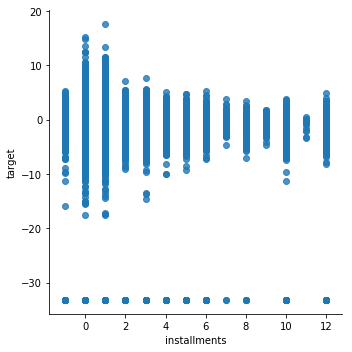

In [27]:
sns.lmplot('installments', 'target', data=Train, fit_reg=False)

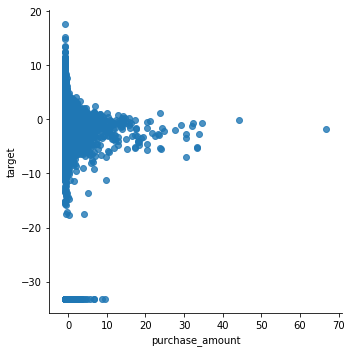

In [28]:
sns.lmplot('purchase_amount', 'target', data=Train, fit_reg=False)

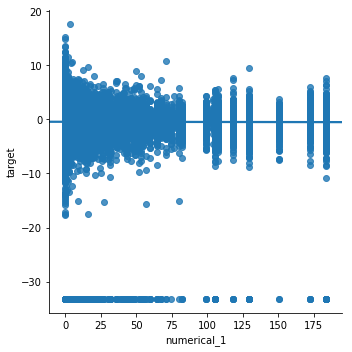

In [30]:
sns.lmplot('numerical_1', 'target', data=Train, fit_reg=True)

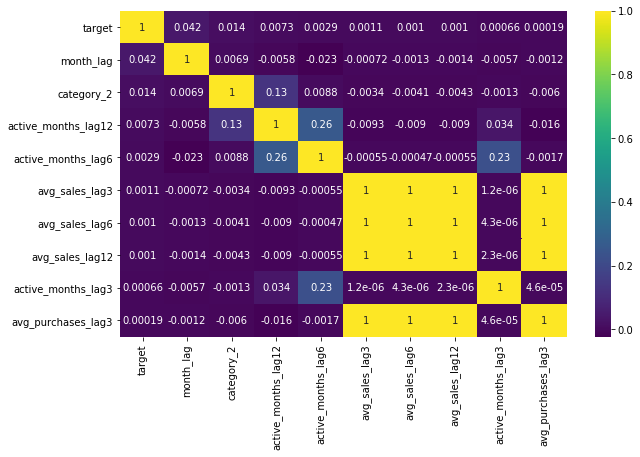

In [31]:
k = 10 #number of variables for heatmap
cols = Train.corr().nlargest(k, 'target')['target'].index
cm = Train[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [43]:
from datetime import datetime
 
year = lambda Train: datetime.strptime(Train, "%m/%d/%Y %H:%M" ).year #note this format is specific to dataset
Train['purchase_year'] = Train['purchase_date'].map(year)# eg value of purchase date will be 2017-11-05 23:30:27
Train.head() # here we can eTraintract year 

# for month
month = lambda Train: datetime.strptime(Train, "%m/%d/%Y %H:%M" ).month
Train['purchase_month'] = Train['purchase_date'].map(month)
Train.head()
# for day
day = lambda Train: datetime.strptime(Train, "%m/%d/%Y %H:%M" ).day
Train['purchase_day'] = Train['purchase_date'].map(day)
Train.head()
# for hour
hour = lambda Train: datetime.strptime(Train, "%m/%d/%Y %H:%M" ).hour
Train['purchase_hour'] = Train['purchase_date'].map(hour)
Train.head()
minitue = lambda Train: datetime.strptime(Train, "%m/%d/%Y %H:%M" ).minute
Train['purchase_minitue'] = Train['purchase_date'].map(minitue)
Train.head()
# similary till seconds we can eTraintract these feature
# now suppose the format will be this 


,first_active_month,feature_1,feature_2,feature_3,target,authorized_flag,category_1,installments,category_3,month_lag,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,purchase_year,purchase_month,purchase_day,purchase_hour,purchase_minitue
0,6,5,2,1,-0.820283,Y,N,0,A,1,...,6,1.29,1.261291,12,N,2018,3,30,10,30
1,10,2,3,0,1.272357,Y,N,1,B,2,...,6,1.29,1.261291,12,N,2018,4,29,18,17
2,11,2,2,0,-0.340947,Y,N,0,A,2,...,6,1.29,1.261291,12,N,2018,4,24,18,8
3,7,2,1,0,-1.603394,Y,N,1,B,2,...,6,1.29,1.261291,12,N,2017,12,12,22,40
4,12,2,1,0,0.105042,Y,N,1,B,1,...,6,1.29,1.261291,12,N,2018,3,3,21,3


In [39]:
Train['first_active_month']

0         2017-06
1         2017-10
2         2017-11
3         2017-07
4         2016-12
5         2017-07
6         2017-08
7         2017-07
8         2017-05
9         2017-09
10        2016-11
11        2017-07
12        2017-06
13        2017-02
14        2017-10
15        2017-12
16        2017-06
17        2017-04
18        2016-12
19        2016-05
20        2017-12
21        2017-11
22        2016-05
23        2017-10
24        2016-12
25        2017-08
26        2016-11
27        2016-09
28        2017-07
29        2015-02
           ...   
173850    2017-04
173851    2016-12
173852    2016-08
173853    2017-07
173854    2017-07
173855    2017-08
173856    2017-10
173857    2016-12
173858    2017-09
173859    2016-10
173860    2017-09
173861    2015-10
173862    2017-02
173863    2017-05
173864    2015-08
173865    2016-07
173866    2017-02
173867    2017-06
173868    2017-01
173869    2017-09
173870    2017-11
173871    2017-07
173872    2016-05
173873    2016-05
173874    

In [46]:
import dill
dill.dump_session('notebook_env.db')

In [1]:
import dill
dill.load_session('notebook_env.db')

In [2]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109657 entries, 0 to 109656
Data columns (total 40 columns):
Unnamed: 0                     109657 non-null int64
first_active_month             109657 non-null object
card_id                        109657 non-null object
feature_1                      109657 non-null int64
feature_2                      109657 non-null int64
feature_3                      109657 non-null int64
authorized_flag                109657 non-null object
city_id_x                      109657 non-null int64
category_1_x                   109657 non-null object
installments                   109657 non-null int64
category_3                     107042 non-null object
merchant_category_id_x         109657 non-null int64
merchant_id                    109657 non-null object
month_lag                      109657 non-null int64
purchase_amount                109657 non-null float64
purchase_date                  109657 non-null object
category_2_x                   9

In [3]:
len(Train)

173880

In [4]:
Test.drop(['city_id_y','state_id_y','category_2_y','category_1_y','subsector_id_y','merchant_category_id_y'],inplace=True,axis=1)
Test.rename(columns={'category_1_x':'category_1','category_2_x':'category_2'},inplace=True)
Test.info()
Test.drop(['city_id_x','merchant_category_id_x','state_id_x','subsector_id_x','merchant_group_id','Unnamed: 0'],axis=1,inplace=True)
Test.drop(['merchant_id','card_id'],inplace=True,axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109657 entries, 0 to 109656
Data columns (total 34 columns):
Unnamed: 0                     109657 non-null int64
first_active_month             109657 non-null object
card_id                        109657 non-null object
feature_1                      109657 non-null int64
feature_2                      109657 non-null int64
feature_3                      109657 non-null int64
authorized_flag                109657 non-null object
city_id_x                      109657 non-null int64
category_1                     109657 non-null object
installments                   109657 non-null int64
category_3                     107042 non-null object
merchant_category_id_x         109657 non-null int64
merchant_id                    109657 non-null object
month_lag                      109657 non-null int64
purchase_amount                109657 non-null float64
purchase_date                  109657 non-null object
category_2                     9

In [6]:
Test.columns[Test.isna().any()].tolist()

['category_3',
 'category_2',
 'avg_sales_lag3',
 'avg_sales_lag6',
 'avg_sales_lag12']

In [7]:
Test['category_3'] = Test['category_3'].fillna(Test['category_3'].mode()[0])
Test['category_2'] = Test['category_2'].fillna(Test['category_2'].mode()[0])
Test['avg_sales_lag3'] = Test['avg_sales_lag3'].fillna(Test['avg_sales_lag3'].median())
Test['avg_sales_lag6'] = Test['avg_sales_lag6'].fillna(Test['avg_sales_lag6'].median())
Test['avg_sales_lag12'] = Test['avg_sales_lag12'].fillna(Test['avg_sales_lag12'].median())

In [8]:
Test.columns[Test.isna().any()].tolist()

[]

In [10]:
from datetime import datetime
 
year = lambda Test: datetime.strptime(Test, "%m/%d/%Y %H:%M" ).year #note this format is specific to dataset
Test['purchase_year'] = Test['purchase_date'].map(year)# eg value of purchase date will be 2017-11-05 23:30:27
Test.head() # here we can eTesttract year 

# for month
month = lambda Test: datetime.strptime(Test, "%m/%d/%Y %H:%M" ).month
Test['purchase_month'] = Test['purchase_date'].map(month)
Test.head()
# for day
day = lambda Test: datetime.strptime(Test, "%m/%d/%Y %H:%M" ).day
Test['purchase_day'] = Test['purchase_date'].map(day)
Test.head()
# for hour
hour = lambda Test: datetime.strptime(Test, "%m/%d/%Y %H:%M" ).hour
Test['purchase_hour'] = Test['purchase_date'].map(hour)
Test.head()
minitue = lambda Test: datetime.strptime(Test, "%m/%d/%Y %H:%M" ).minute
Test['purchase_minitue'] = Test['purchase_date'].map(minitue)
Test.head()
# similary till seconds we can eTesttract these feature
# now suppose the format will be this 


,first_active_month,feature_1,feature_2,feature_3,authorized_flag,category_1,installments,category_3,month_lag,purchase_amount,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,purchase_year,purchase_month,purchase_day,purchase_hour,purchase_minitue
0,2017-04,3,3,1,Y,N,3,C,2,-0.383266,...,6,0.87,0.877649,12,N,2018,2,3,9,44
1,2017-02,5,1,1,Y,N,1,B,1,-0.666065,...,6,0.87,0.877649,12,N,2018,2,26,12,2
2,2017-03,3,2,1,Y,N,0,A,2,-0.671775,...,6,1.64,1.795852,12,N,2018,4,20,21,54
3,2017-10,3,1,1,Y,N,0,A,2,-0.634209,...,6,1.64,1.795852,12,N,2018,4,24,11,23
4,2016-11,3,3,1,Y,N,0,A,2,-0.716855,...,6,1.64,1.795852,12,N,2018,4,29,12,58


In [11]:
Train.head()

,first_active_month,feature_1,feature_2,feature_3,target,authorized_flag,category_1,installments,category_3,month_lag,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,purchase_year,purchase_month,purchase_day,purchase_hour,purchase_minitue
0,6,5,2,1,-0.820283,Y,N,0,A,1,...,6,1.29,1.261291,12,N,2018,3,30,10,30
1,10,2,3,0,1.272357,Y,N,1,B,2,...,6,1.29,1.261291,12,N,2018,4,29,18,17
2,11,2,2,0,-0.340947,Y,N,0,A,2,...,6,1.29,1.261291,12,N,2018,4,24,18,8
3,7,2,1,0,-1.603394,Y,N,1,B,2,...,6,1.29,1.261291,12,N,2017,12,12,22,40
4,12,2,1,0,0.105042,Y,N,1,B,1,...,6,1.29,1.261291,12,N,2018,3,3,21,3


In [12]:
import dill
dill.dump_session('notebook_env.db')

In [1]:
import dill
dill.load_session('notebook_env.db')

In [5]:
from sklearn.preprocessing import LabelEncoder
lablel_encoder = LabelEncoder()
Test['category_1'] = lablel_encoder.fit_transform(Test['category_1'])
Test['most_recent_sales_range'] = lablel_encoder.fit_transform(Test['most_recent_sales_range'])
Test['most_recent_purchases_range'] = lablel_encoder.fit_transform(Test['most_recent_purchases_range'])
Test['category_4'] = lablel_encoder.fit_transform(Test['category_4'])
Test['authorized_flag'] = lablel_encoder.fit_transform(Test['authorized_flag'])
Test['category_3'] = lablel_encoder.fit_transform(Test['category_3'])


In [6]:
from sklearn.preprocessing import LabelEncoder
lablel_encoder = LabelEncoder()
Train['category_1'] = lablel_encoder.fit_transform(Train['category_1'])
Train['most_recent_sales_range'] = lablel_encoder.fit_transform(Train['most_recent_sales_range'])
Train['most_recent_purchases_range'] = lablel_encoder.fit_transform(Train['most_recent_purchases_range'])
Train['category_4'] = lablel_encoder.fit_transform(Train['category_4'])
Train['authorized_flag'] = lablel_encoder.fit_transform(Train['authorized_flag'])
Train['category_3'] = lablel_encoder.fit_transform(Train['category_3'])


In [7]:
X_Train=Train.drop(['target'],axis=1)

In [8]:
Y_Train=Train['target']

In [9]:
X_Train

,first_active_month,feature_1,feature_2,feature_3,authorized_flag,category_1,installments,category_3,month_lag,purchase_amount,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,purchase_year,purchase_month,purchase_day,purchase_hour,purchase_minitue
0,6,5,2,1,0,0,0,0,1,-0.491457,...,6,1.29,1.261291,12,0,2018,3,30,10,30
1,10,2,3,0,0,0,1,1,2,-0.683195,...,6,1.29,1.261291,12,0,2018,4,29,18,17
2,11,2,2,0,0,0,0,0,2,-0.735638,...,6,1.29,1.261291,12,0,2018,4,24,18,8
3,7,2,1,0,0,0,1,1,2,-0.659754,...,6,1.29,1.261291,12,0,2017,12,12,22,40
4,12,2,1,0,0,0,1,1,1,-0.710844,...,6,1.29,1.261291,12,0,2018,3,3,21,3
5,7,4,2,0,0,0,0,0,1,-0.736389,...,6,1.29,1.261291,12,0,2018,3,18,15,37
6,8,2,1,0,0,0,1,1,2,-0.720687,...,6,1.29,1.261291,12,0,2018,4,29,16,40
7,7,5,1,1,0,0,1,1,2,-0.680941,...,6,1.29,1.261291,12,0,2018,4,2,18,11
8,5,3,2,1,0,0,0,0,2,-0.736389,...,6,1.29,1.261291,12,0,2018,4,4,18,4
9,9,2,3,0,0,0,1,1,2,-0.715352,...,6,1.29,1.261291,12,0,2018,4,4,8,22


In [10]:
Y_Train

0        -0.820283
1         1.272357
2        -0.340947
3        -1.603394
4         0.105042
5         0.502815
6        -1.125190
7         0.227376
8        -4.490555
9        -0.009152
10       -0.059434
11       -1.927998
12        1.513500
13        0.327250
14       -0.050213
15        1.225662
16       -0.501136
17        2.393137
18       -8.638291
19        0.761368
20        0.192544
21        0.498555
22        1.306727
23        0.122378
24        0.724920
25        0.192100
26       -0.069132
27        0.514072
28        0.685826
29       -3.300017
            ...   
173850   -0.683858
173851   -2.582127
173852    2.158825
173853    1.663661
173854    1.596631
173855    1.681506
173856    3.095465
173857    0.569070
173858   -0.088165
173859    0.536974
173860   -2.733045
173861    0.789140
173862    1.552821
173863   -0.783497
173864    0.246894
173865    0.701308
173866    2.285571
173867   -1.196514
173868   -0.802222
173869    0.586432
173870    5.090007
173871    0.

In [24]:
X_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173880 entries, 0 to 173879
Data columns (total 29 columns):
feature_1                      173880 non-null int64
feature_2                      173880 non-null int64
feature_3                      173880 non-null int64
authorized_flag                173880 non-null int64
category_1                     173880 non-null int64
installments                   173880 non-null int64
category_3                     173880 non-null int64
month_lag                      173880 non-null int64
purchase_amount                173880 non-null float64
category_2                     173880 non-null float64
numerical_1                    173880 non-null float64
numerical_2                    173880 non-null float64
most_recent_sales_range        173880 non-null int64
most_recent_purchases_range    173880 non-null int64
avg_sales_lag3                 173880 non-null float64
avg_purchases_lag3             173880 non-null float64
active_months_lag3           

In [30]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0,alpha=0.1)
regr.fit(X_Train, Y_Train)

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
print(regr.coef_)

[-2.93565339e-03 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -5.14212771e-02 -0.00000000e+00  1.27599070e-01
 -8.32473583e-02  7.89930959e-04 -0.00000000e+00 -5.20540262e-04
  0.00000000e+00  0.00000000e+00  4.89350966e-06 -1.44632788e-04
  0.00000000e+00  7.24462051e-06 -4.51155804e-04  0.00000000e+00
  3.70897735e-05 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -1.08461205e-01  8.50571134e-03 -0.00000000e+00
 -3.04803424e-04]


In [32]:
print(regr.intercept_) 

-0.3040658820975306


In [19]:
Test.drop(['purchase_date'],axis=1,inplace=True)

In [22]:
Test.drop(['first_active_month'],axis=1,inplace=True)

In [26]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109657 entries, 0 to 109656
Data columns (total 29 columns):
feature_1                      109657 non-null int64
feature_2                      109657 non-null int64
feature_3                      109657 non-null int64
authorized_flag                109657 non-null int64
category_1                     109657 non-null int64
installments                   109657 non-null int64
category_3                     109657 non-null int64
month_lag                      109657 non-null int64
purchase_amount                109657 non-null float64
category_2                     109657 non-null float64
numerical_1                    109657 non-null float64
numerical_2                    109657 non-null float64
most_recent_sales_range        109657 non-null int64
most_recent_purchases_range    109657 non-null int64
avg_sales_lag3                 109657 non-null float64
avg_purchases_lag3             109657 non-null float64
active_months_lag3           

In [27]:
X_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173880 entries, 0 to 173879
Data columns (total 29 columns):
feature_1                      173880 non-null int64
feature_2                      173880 non-null int64
feature_3                      173880 non-null int64
authorized_flag                173880 non-null int64
category_1                     173880 non-null int64
installments                   173880 non-null int64
category_3                     173880 non-null int64
month_lag                      173880 non-null int64
purchase_amount                173880 non-null float64
category_2                     173880 non-null float64
numerical_1                    173880 non-null float64
numerical_2                    173880 non-null float64
most_recent_sales_range        173880 non-null int64
most_recent_purchases_range    173880 non-null int64
avg_sales_lag3                 173880 non-null float64
avg_purchases_lag3             173880 non-null float64
active_months_lag3           

In [33]:
y_pred=regr.predict(Test)

In [34]:
Test['target']=list(y_pred)

In [29]:
X_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173880 entries, 0 to 173879
Data columns (total 29 columns):
feature_1                      173880 non-null int64
feature_2                      173880 non-null int64
feature_3                      173880 non-null int64
authorized_flag                173880 non-null int64
category_1                     173880 non-null int64
installments                   173880 non-null int64
category_3                     173880 non-null int64
month_lag                      173880 non-null int64
purchase_amount                173880 non-null float64
category_2                     173880 non-null float64
numerical_1                    173880 non-null float64
numerical_2                    173880 non-null float64
most_recent_sales_range        173880 non-null int64
most_recent_purchases_range    173880 non-null int64
avg_sales_lag3                 173880 non-null float64
avg_purchases_lag3             173880 non-null float64
active_months_lag3           

In [35]:
Test.to_csv('elasticnet1.csv')

In [36]:
import dill
dill.dump_session('notebook_env.db')

In [2]:
import dill
dill.load_session('notebook_env.db')

In [2]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173880 entries, 0 to 173879
Data columns (total 32 columns):
first_active_month             173880 non-null int64
feature_1                      173880 non-null int64
feature_2                      173880 non-null int64
feature_3                      173880 non-null int64
target                         173880 non-null float64
authorized_flag                173880 non-null int64
category_1                     173880 non-null int64
installments                   173880 non-null int64
category_3                     173880 non-null int64
month_lag                      173880 non-null int64
purchase_amount                173880 non-null float64
purchase_date                  173880 non-null object
category_2                     173880 non-null float64
numerical_1                    173880 non-null float64
numerical_2                    173880 non-null float64
most_recent_sales_range        173880 non-null int64
most_recent_purchases_range   

In [5]:
Test['target'].median()

-0.37551220585039596

In [7]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


In [11]:
parametersGrid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
eNet = ElasticNet()
grid = GridSearchCV(eNet, parametersGrid, scoring='r2', cv=10)

In [12]:
grid.fit(X_Train, Y_Train)

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

GridSearchCV(cv=10, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [1, 5, 10], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [14]:
clf = grid.best_estimator_

In [15]:
clf

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
      l1_ratio=0.30000000000000004, max_iter=10, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
cv_results = grid.cv_results_

In [17]:
 scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')


C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\

In [18]:
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_max_iter,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
71,0.449219,0.036073,0.009880,0.005580,0.01,0.3,10,"{'alpha': 0.01, 'l1_ratio': 0.3000000000000000...",0.014064,0.014001,...,0.017780,0.017754,0.017605,0.017652,0.017654,0.017821,0.017957,0.017820,0.017801,0.000134
70,0.398942,0.040200,0.009700,0.004109,0.01,0.3,5,"{'alpha': 0.01, 'l1_ratio': 0.3000000000000000...",0.014041,0.013986,...,0.017729,0.017674,0.017534,0.017580,0.017591,0.017777,0.017922,0.017755,0.017741,0.000143
67,0.425928,0.042928,0.008681,0.004253,0.01,0.2,5,"{'alpha': 0.01, 'l1_ratio': 0.2, 'max_iter': 5}",0.014039,0.013947,...,0.017753,0.017700,0.017559,0.017606,0.017615,0.017800,0.017944,0.017779,0.017765,0.000141
68,0.451078,0.061014,0.010044,0.003147,0.01,0.2,10,"{'alpha': 0.01, 'l1_ratio': 0.2, 'max_iter': 10}",0.014068,0.013964,...,0.017806,0.017782,0.017632,0.017680,0.017680,0.017846,0.017982,0.017847,0.017827,0.000133
131,0.352841,0.013710,0.008062,0.003124,1,0.3,10,"{'alpha': 1, 'l1_ratio': 0.30000000000000004, ...",0.001646,0.003584,...,0.005181,0.004990,0.005243,0.005004,0.005197,0.005511,0.005751,0.005468,0.005365,0.000266
92,0.405318,0.017617,0.009230,0.005410,0.1,0,10,"{'alpha': 0.1, 'l1_ratio': 0.0, 'max_iter': 10}",0.011966,0.010423,...,0.015307,0.015312,0.015182,0.015198,0.015140,0.015394,0.015561,0.015261,0.015355,0.000176
134,0.360849,0.014395,0.007955,0.003135,1,0.4,10,"{'alpha': 1, 'l1_ratio': 0.4, 'max_iter': 10}",0.000879,0.003143,...,0.004171,0.003977,0.004255,0.004025,0.004206,0.004520,0.004737,0.004438,0.004373,0.000274
137,0.353740,0.009800,0.009909,0.002200,1,0.5,10,"{'alpha': 1, 'l1_ratio': 0.5, 'max_iter': 10}",-0.000196,0.002407,...,0.002888,0.002691,0.003002,0.002783,0.002953,0.003266,0.003453,0.003133,0.003116,0.000289
136,0.361354,0.026708,0.009156,0.002478,1,0.5,5,"{'alpha': 1, 'l1_ratio': 0.5, 'max_iter': 5}",-0.000140,0.002426,...,0.002876,0.002668,0.002993,0.002762,0.002945,0.003260,0.003452,0.003126,0.003106,0.000294
74,0.396138,0.013978,0.007975,0.007215,0.01,0.4,10,"{'alpha': 0.01, 'l1_ratio': 0.4, 'max_iter': 10}",0.014054,0.014032,...,0.017749,0.017721,0.017573,0.017620,0.017623,0.017790,0.017928,0.017788,0.017770,0.000136


In [19]:
import dill
dill.dump_session('notebook_env.db')

In [1]:
import dill
dill.load_session('notebook_env.db')

C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator ElasticNet from version 0.19.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator ElasticNet from version 0.19.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator ElasticNet from version 0.19.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Aakash\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator ElasticNet from version 0.19.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own r

In [2]:
Test.drop(['target'],axis=1,inplace=True)

In [3]:
y_pred_grid=grid.predict(Test)

In [4]:
Test['target']=list(y_pred_grid)

In [8]:
Test.to_csv('cardid_test_grid.csv')

In [6]:
Test['target'].median()

-0.3356190768449778

In [7]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=5,n_estimators=100)

In [ ]:
regr.fit()

In [8]:
import dill
dill.dump_session('notebook_env.db')